In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('medical_insurance_fraud_train.csv', index_col=0)
df.head()

,Age,Smoker,Gender,BMI,Diabetic,Cost,Fraud
64107,60.0,1.0,0.0,40.0,0.0,27149.008301,0.0
81435,22.0,0.0,1.0,26.0,0.0,6828.550440,0.0
22431,59.0,0.0,1.0,34.0,1.0,17030.491415,0.0
15782,93.0,1.0,0.0,30.0,1.0,36058.006160,0.0
48747,30.0,1.0,1.0,9.0,0.0,24338.101158,0.0


In [3]:
df_test = pd.read_csv('medical_insurance_fraud_test.csv', index_col=0)
df_test.head()

,Age,Smoker,Gender,BMI,Diabetic,Cost,Fraud
22761,52.0,0.0,1.0,17.0,0.0,7349.636127,0.0
21918,27.0,1.0,1.0,33.0,0.0,26874.206884,0.0
29117,11.0,1.0,0.0,30.0,1.0,31185.722038,0.0
23035,19.0,1.0,1.0,9.0,1.0,31575.084841,0.0
12195,65.0,0.0,0.0,10.0,0.0,5542.750893,0.0


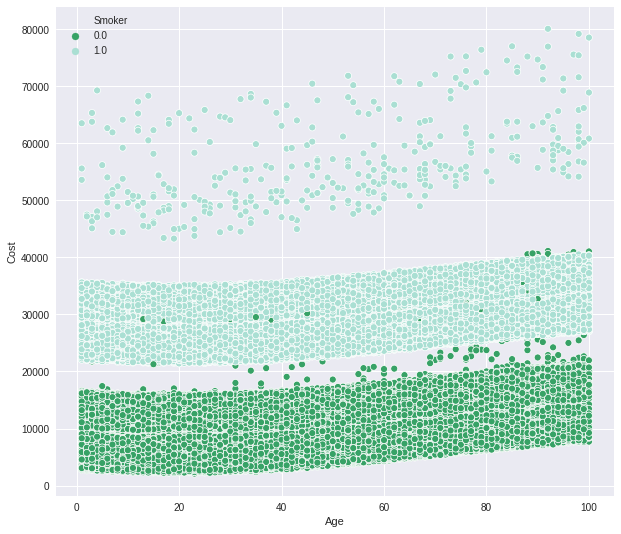

In [4]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10, 9
sns.scatterplot(x="Age", y="Cost", data=df, palette='BuGn_r', hue='Smoker')

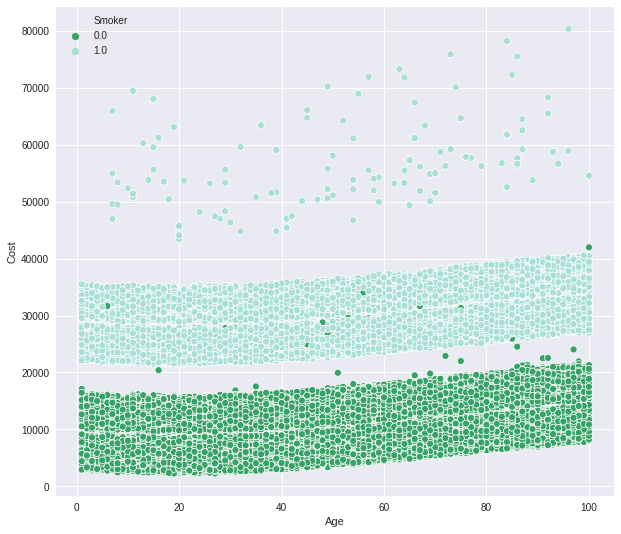

In [5]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10, 9
sns.scatterplot(x="Age", y="Cost", data=df_test, palette='BuGn_r', hue='Smoker')

In [6]:
def bucketize(val, size, count):
    i=0
    for i in range(count):
        if val <= (i+1)*size:
            return i
    return i

def bucketize_df(df):
    df['Age_group'] = [bucketize(x, 10, 5) for x in df['Age']]
    df['BMI_group'] = [bucketize(x, 10, 5) for x in df['BMI']]
    df.drop(['Age'], axis=1, inplace=True)
    df.drop(['BMI'], axis=1, inplace=True)
    return df

df = bucketize_df(df)
df_test = bucketize_df(df_test)

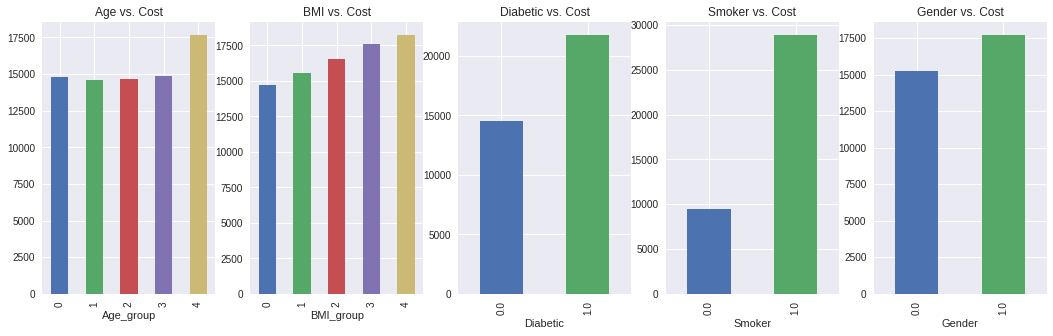

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 5))

df.groupby('Age_group')['Cost'].mean().plot(kind='bar', ax=axes[0], title='Age vs. Cost')
df.groupby('BMI_group')['Cost'].mean().plot(kind='bar', ax=axes[1], title='BMI vs. Cost')
df.groupby('Diabetic')['Cost'].mean().plot(kind='bar', ax=axes[2], title='Diabetic vs. Cost')
df.groupby('Smoker')['Cost'].mean().plot(kind='bar', ax=axes[3], title='Smoker vs. Cost')
df.groupby('Gender')['Cost'].mean().plot(kind='bar', ax=axes[4], title='Gender vs. Cost')

plt.show()

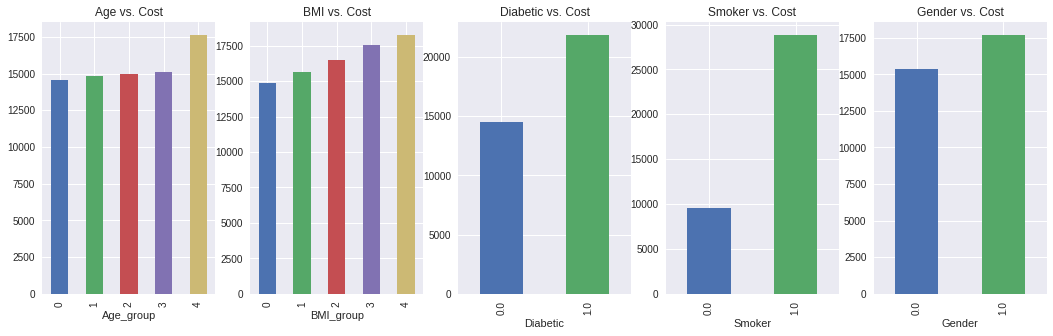

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 5))

df_test.groupby('Age_group')['Cost'].mean().plot(kind='bar', ax=axes[0], title='Age vs. Cost')
df_test.groupby('BMI_group')['Cost'].mean().plot(kind='bar', ax=axes[1], title='BMI vs. Cost')
df_test.groupby('Diabetic')['Cost'].mean().plot(kind='bar', ax=axes[2], title='Diabetic vs. Cost')
df_test.groupby('Smoker')['Cost'].mean().plot(kind='bar', ax=axes[3], title='Smoker vs. Cost')
df_test.groupby('Gender')['Cost'].mean().plot(kind='bar', ax=axes[4], title='Gender vs. Cost')

plt.show()

In [9]:
def one_hot_encode(df):
    df = pd.concat([df,pd.get_dummies(df['Age_group'], prefix='Age')],axis=1)
    df = pd.concat([df,pd.get_dummies(df['BMI_group'], prefix='BMI')],axis=1)
    df.drop(['Age_group'], axis=1, inplace=True)
    df.drop(['BMI_group'], axis=1, inplace=True)
    return df

df = one_hot_encode(df)
df.head()

,Smoker,Gender,Diabetic,Cost,Fraud,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4
64107,1.0,0.0,0.0,27149.008301,0.0,0,0,0,0,1,0,0,0,1,0
81435,0.0,1.0,0.0,6828.550440,0.0,0,0,1,0,0,0,0,1,0,0
22431,0.0,1.0,1.0,17030.491415,0.0,0,0,0,0,1,0,0,0,1,0
15782,1.0,0.0,1.0,36058.006160,0.0,0,0,0,0,1,0,0,1,0,0
48747,1.0,1.0,0.0,24338.101158,0.0,0,0,1,0,0,1,0,0,0,0


In [10]:
df_test = one_hot_encode(df_test)
df_test.head()

,Smoker,Gender,Diabetic,Cost,Fraud,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4
22761,0.0,1.0,0.0,7349.636127,0.0,0,0,0,0,1,0,1,0,0,0
21918,1.0,1.0,0.0,26874.206884,0.0,0,0,1,0,0,0,0,0,1,0
29117,1.0,0.0,1.0,31185.722038,0.0,0,1,0,0,0,0,0,1,0,0
23035,1.0,1.0,1.0,31575.084841,0.0,0,1,0,0,0,1,0,0,0,0
12195,0.0,0.0,0.0,5542.750893,0.0,0,0,0,0,1,1,0,0,0,0


In [11]:
outliers = pd.DataFrame()
outliers['cust_id'] = df.index.values
outliers['Fraud'] = df['Fraud']
outliers['Cost'] = df['Cost']

In [12]:
outliers_test = pd.DataFrame()
outliers_test['cust_id'] = df_test.index.values
outliers_test['Fraud'] = df_test['Fraud']
outliers_test['Cost'] = df_test['Cost']

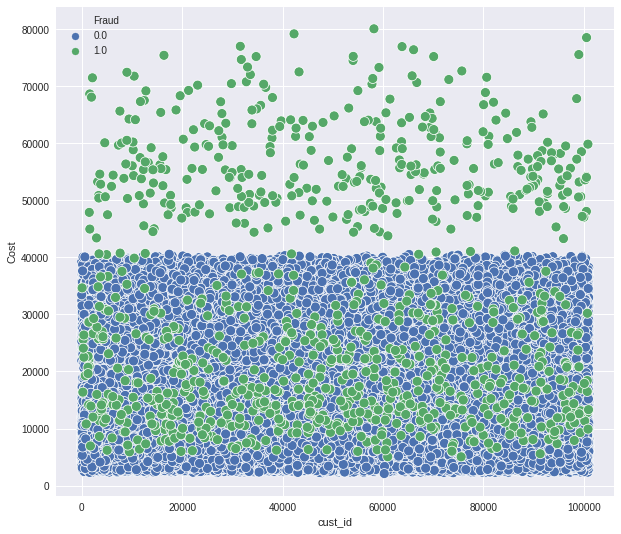

In [13]:
sns.scatterplot(x='cust_id', y='Cost', data=outliers, s=100, legend='brief', hue='Fraud')

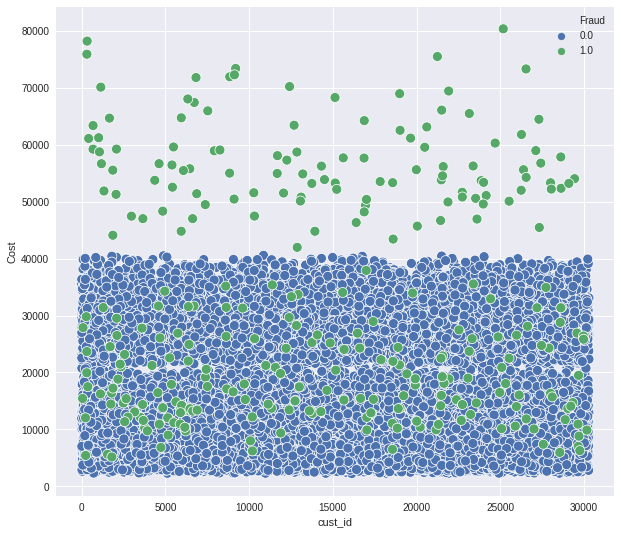

In [14]:
sns.scatterplot(x='cust_id', y='Cost', data=outliers_test, s=100, legend='brief', hue='Fraud')

In [15]:
pd.value_counts(df['Fraud'])

0.0    100000
1.0      1000
Name: Fraud, dtype: int64

In [16]:
pd.value_counts(df_test['Fraud'])

0.0    30000
1.0      300
Name: Fraud, dtype: int64

In [17]:
df.Cost.describe()

count    101000.000000
mean      16485.474020
std       10342.351121
min        2112.870246
25%        7611.921299
50%       12874.452050
75%       26044.832209
max       80021.484888
Name: Cost, dtype: float64

In [18]:
df_test.Cost.describe()

count    30300.000000
mean     16526.867915
std      10337.683697
min       2253.404003
25%       7626.555685
50%      12943.563178
75%      25986.360584
max      80337.557453
Name: Cost, dtype: float64

In [19]:
dataX = df.copy().drop(['Fraud'],axis=1)
dataX.head()

,Smoker,Gender,Diabetic,Cost,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4
64107,1.0,0.0,0.0,27149.008301,0,0,0,0,1,0,0,0,1,0
81435,0.0,1.0,0.0,6828.550440,0,0,1,0,0,0,0,1,0,0
22431,0.0,1.0,1.0,17030.491415,0,0,0,0,1,0,0,0,1,0
15782,1.0,0.0,1.0,36058.006160,0,0,0,0,1,0,0,1,0,0
48747,1.0,1.0,0.0,24338.101158,0,0,1,0,0,1,0,0,0,0


In [20]:
testDataX = df_test.copy().drop(['Fraud'],axis=1)
testDataX.head()

,Smoker,Gender,Diabetic,Cost,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4
22761,0.0,1.0,0.0,7349.636127,0,0,0,0,1,0,1,0,0,0
21918,1.0,1.0,0.0,26874.206884,0,0,1,0,0,0,0,0,1,0
29117,1.0,0.0,1.0,31185.722038,0,1,0,0,0,0,0,1,0,0
23035,1.0,1.0,1.0,31575.084841,0,1,0,0,0,1,0,0,0,0
12195,0.0,0.0,0.0,5542.750893,0,0,0,0,1,1,0,0,0,0


In [21]:
testDataY = df_test['Fraud'].copy()
testDataY.head()

22761    0.0
21918    0.0
29117    0.0
23035    0.0
12195    0.0
Name: Fraud, dtype: float64

In [22]:
from sklearn import preprocessing as pp

featuresToScale = dataX.columns

sX = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

dataX.head()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Smoker,Gender,Diabetic,Cost,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4
64107,1.331731,-1.000515,-0.613313,1.031060,-0.336241,-0.335511,-0.334817,-0.332453,0.821745,-0.415359,-0.567639,-0.573738,1.772586,-0.36943
81435,-0.750903,0.999485,-0.613313,-0.933731,-0.336241,-0.335511,2.986711,-0.332453,-1.216923,-0.415359,-0.567639,1.742957,-0.564148,-0.36943
22431,-0.750903,0.999485,1.630488,0.052698,-0.336241,-0.335511,-0.334817,-0.332453,0.821745,-0.415359,-0.567639,-0.573738,1.772586,-0.36943
15782,1.331731,-1.000515,1.630488,1.892474,-0.336241,-0.335511,-0.334817,-0.332453,0.821745,-0.415359,-0.567639,1.742957,-0.564148,-0.36943
48747,1.331731,0.999485,-0.613313,0.759273,-0.336241,-0.335511,2.986711,-0.332453,-1.216923,2.407553,-0.567639,-0.573738,-0.564148,-0.36943


In [23]:
dataX.shape

(101000, 14)

In [24]:
featuresToScale = testDataX.columns

testDataX.loc[:,featuresToScale] = sX.fit_transform(testDataX[featuresToScale])

testDataX.head()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Smoker,Gender,Diabetic,Cost,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4
22761,-0.755380,1.001189,-0.607604,-0.887760,-0.331558,-0.335834,-0.333272,-0.332171,0.816048,-0.409262,1.736636,-0.568712,-0.566120,-0.370024
21918,1.323837,1.001189,-0.607604,1.000951,-0.331558,-0.335834,3.000550,-0.332171,-1.225419,-0.409262,-0.575826,-0.568712,1.766411,-0.370024
29117,1.323837,-0.998813,1.645810,1.418025,-0.331558,2.977666,-0.333272,-0.332171,-1.225419,-0.409262,-0.575826,1.758360,-0.566120,-0.370024
23035,1.323837,1.001189,1.645810,1.455690,-0.331558,2.977666,-0.333272,-0.332171,-1.225419,2.443425,-0.575826,-0.568712,-0.566120,-0.370024
12195,-0.755380,-0.998813,-0.607604,-1.062549,-0.331558,-0.335834,-0.333272,-0.332171,0.816048,2.443425,-0.575826,-0.568712,-0.566120,-0.370024


In [25]:
testDataX.shape

(30300, 14)

In [26]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF) - \
                   np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    
    print('Mean for anomaly scores: ', np.mean(loss))
    
    return loss

In [27]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy

In [28]:
# Call neural network API
model = Sequential()

# Apply linear activation function to input layer
# Generate hidden layer with 14 nodes, the same as the input layer
model.add(Dense(units=14, activation='linear',input_dim=14))
model.add(Dense(units=14, activation='linear'))

# Apply linear activation function to hidden layer
# Generate output layer with 14 nodes
model.add(Dense(units=14, activation='linear'))

In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [30]:
# Train the model
num_epochs = 10
batch_size = 256

history = model.fit(x=dataX, y=dataX,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(dataX, dataX),
                    verbose=1)

W0102 17:58:00.520066 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 101000 samples, validate on 101000 samples
Epoch 1/10
101000/101000 [==============================] - 2s 17us/sample - loss: 0.4069 - accuracy: 0.6361 - val_loss: 0.0278 - val_accuracy: 0.9499
Epoch 2/10
101000/101000 [==============================] - 1s 14us/sample - loss: 0.0080 - accuracy: 0.9833 - val_loss: 0.0026 - val_accuracy: 0.9914
Epoch 3/10
101000/101000 [==============================] - 1s 14us/sample - loss: 0.0022 - accuracy: 0.9917 - val_loss: 0.0020 - val_accuracy: 0.9921
Epoch 4/10
101000/101000 [==============================] - 1s 14us/sample - loss: 0.0019 - accuracy: 0.9920 - val_loss: 0.0018 - val_accuracy: 0.9918
Epoch 5/10
101000/101000 [==============================] - 1s 15us/sample - loss: 0.0018 - accuracy: 0.9922 - val_loss: 0.0018 - val_accuracy: 0.9922
Epoch 6/10
101000/101000 [==============================] - 1s 14us/sample - loss: 0.0017 - accuracy: 0.9923 - val_loss: 0.0017 - val_accuracy: 0.9925
Epoch 7/10
101000/101000 [================

In [31]:
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'], \
                               preds['anomalyScore'])
    average_precision = average_precision_score( \
                        preds['trueLabel'], preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
        {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: Area under the \
        curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds, average_precision

In [32]:
# Evaluate on test set
predictions = model.predict(testDataX, verbose=1)
anomalyScoresAE = anomalyScores(testDataX, predictions)

W0102 17:58:20.614238 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 26us/sample
Mean for anomaly scores:  0.0031098706523319205


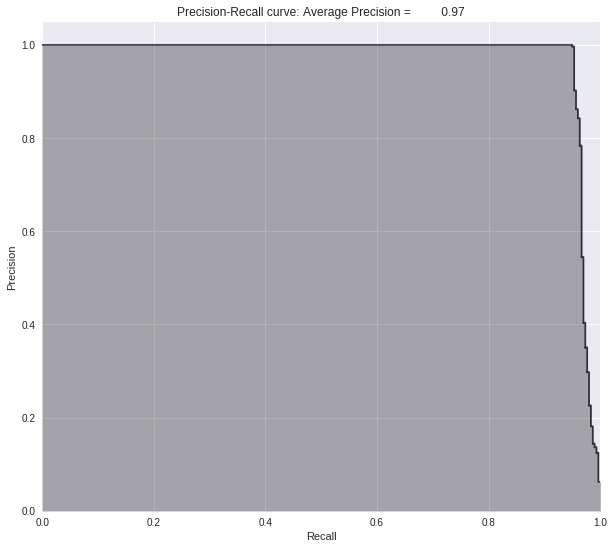

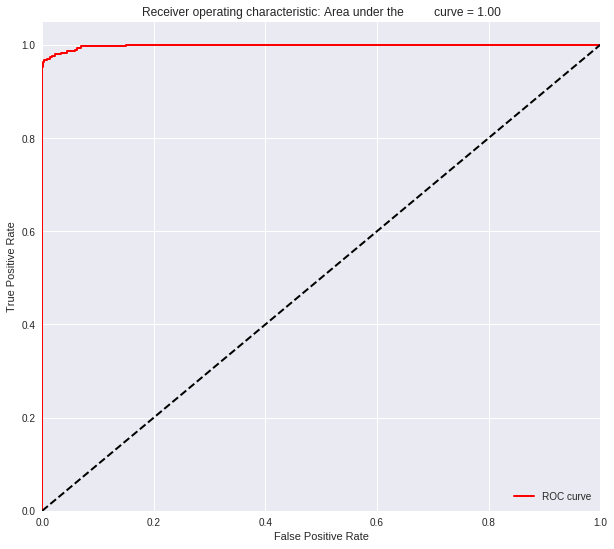

0.9728713343748997

In [33]:
preds = plotResults(testDataY, anomalyScoresAE, True)

preds[1]

W0102 18:02:28.014246 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:02:40.367151 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 26us/sample
Mean for anomaly scores:  0.004077753907305536


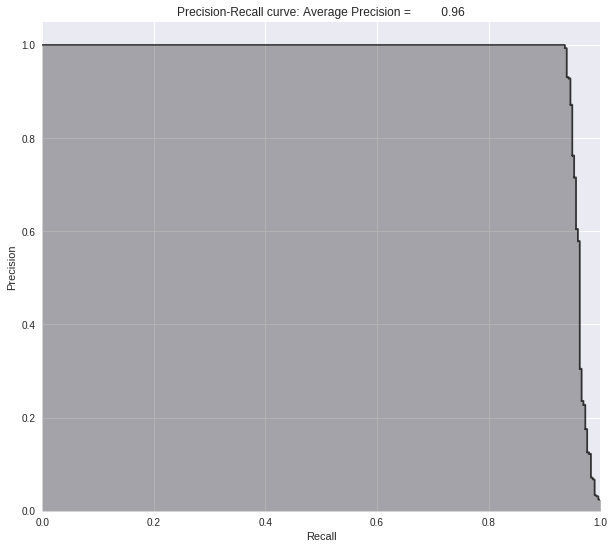

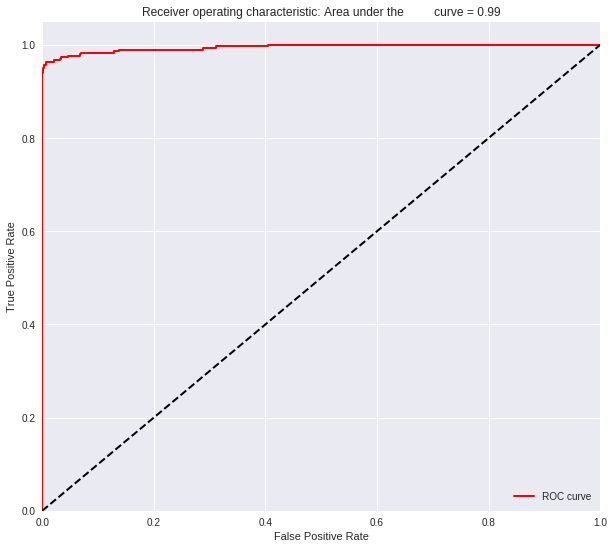

Saving model with best precision:  0.9626841088535527


W0102 18:02:42.633063 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:02:55.352796 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 23us/sample
Mean for anomaly scores:  0.0033387805516674014


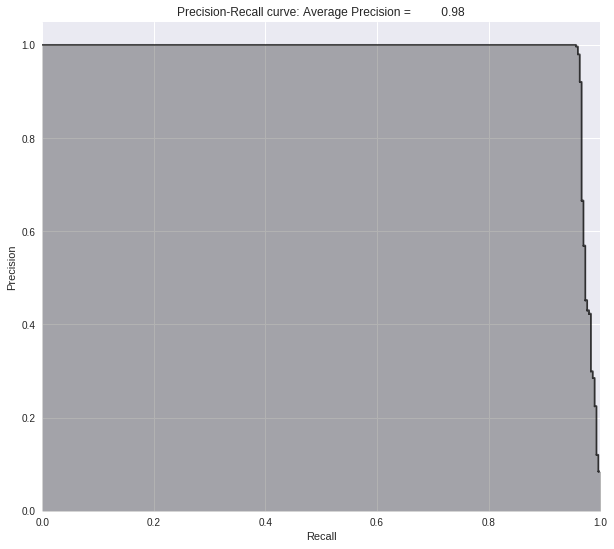

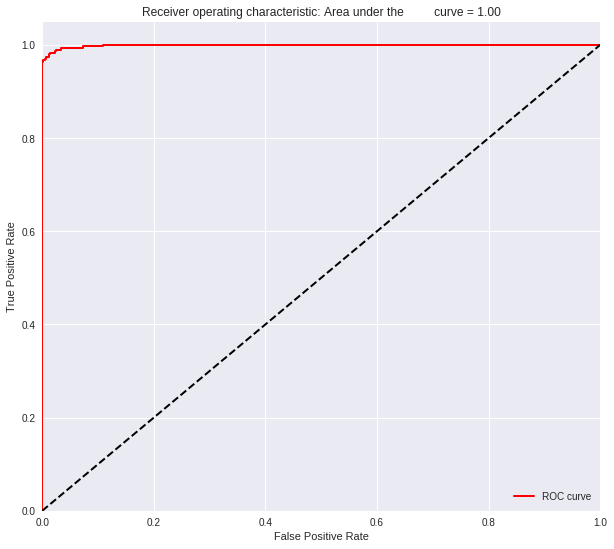

Saving model with best precision:  0.978173639613372


W0102 18:02:57.662354 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:03:10.305905 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 26us/sample
Mean for anomaly scores:  0.002993849394832047


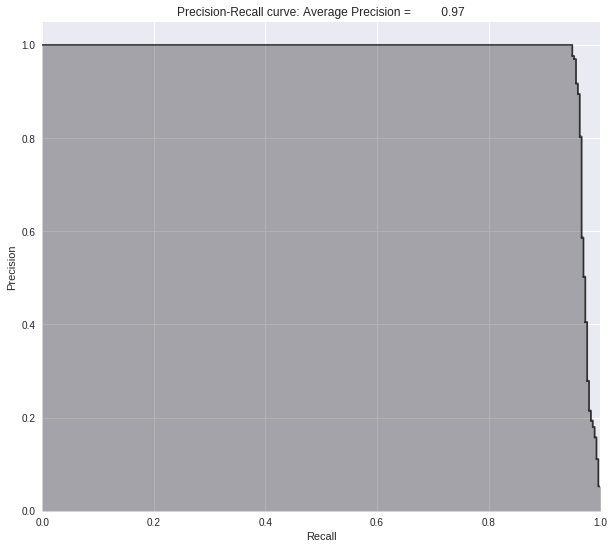

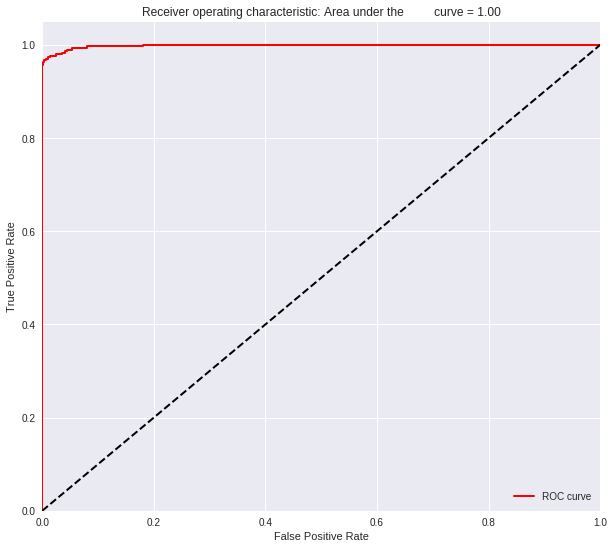

W0102 18:03:11.909071 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:03:24.655478 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 22us/sample
Mean for anomaly scores:  0.00483833890160516


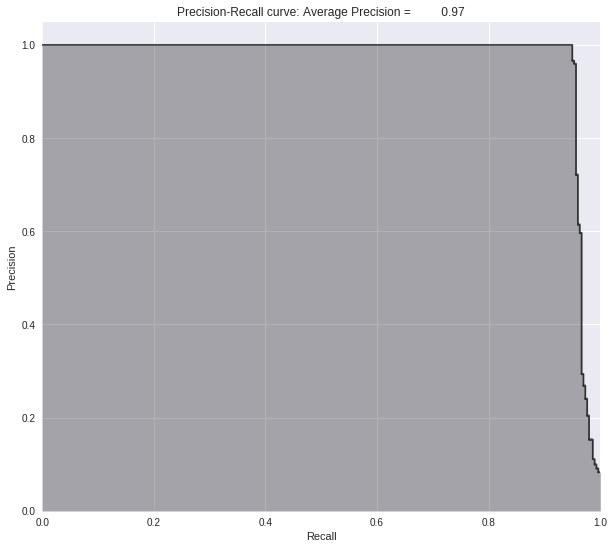

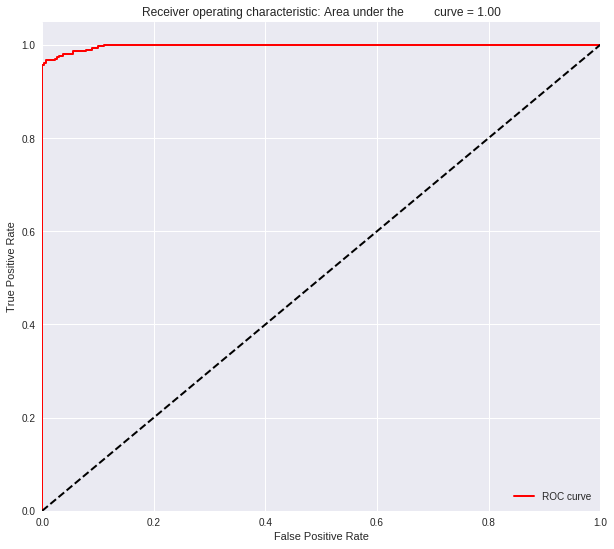

W0102 18:03:26.203415 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:03:39.005906 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 24us/sample
Mean for anomaly scores:  0.0037534299202802678


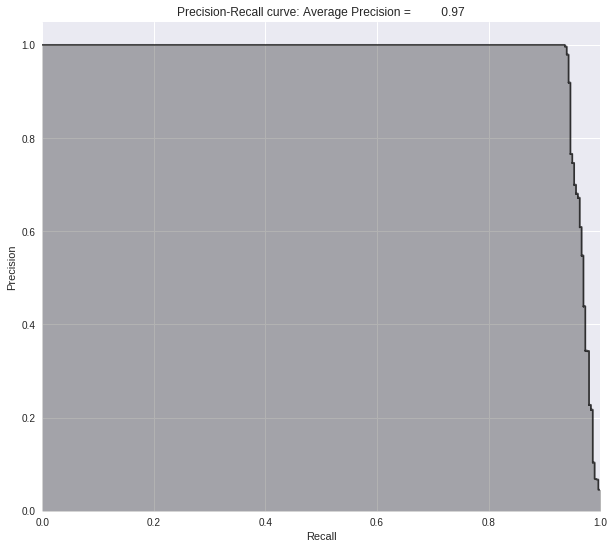

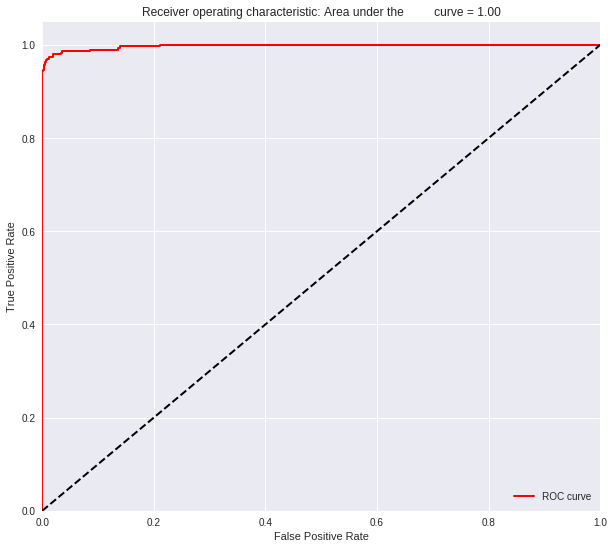

W0102 18:03:40.796984 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:03:53.629187 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 26us/sample
Mean for anomaly scores:  0.054582822504103734


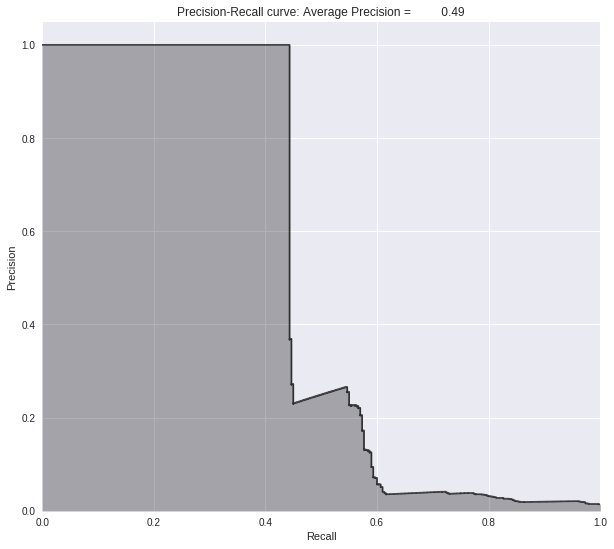

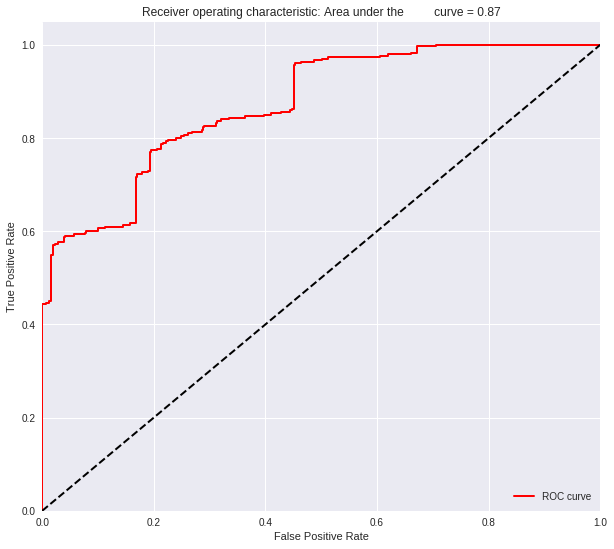

W0102 18:03:55.302876 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:04:08.220147 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 25us/sample
Mean for anomaly scores:  0.004517015888923552


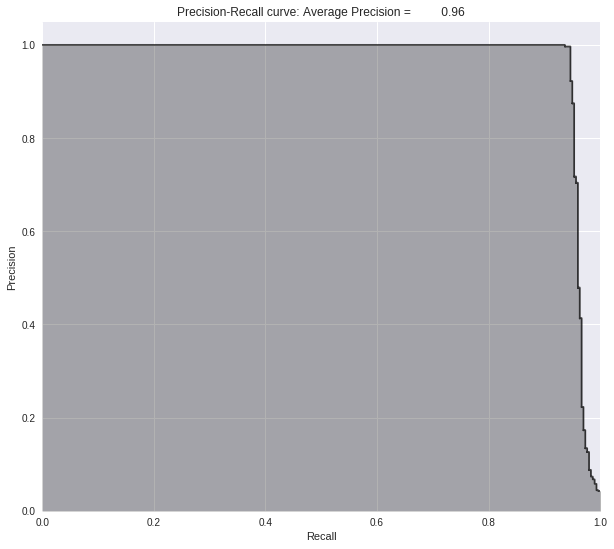

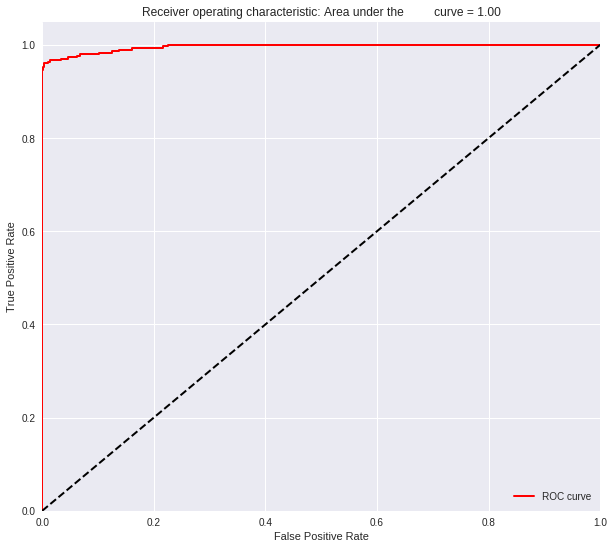

W0102 18:04:09.872777 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:04:22.647324 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 22us/sample
Mean for anomaly scores:  0.00453745319435935


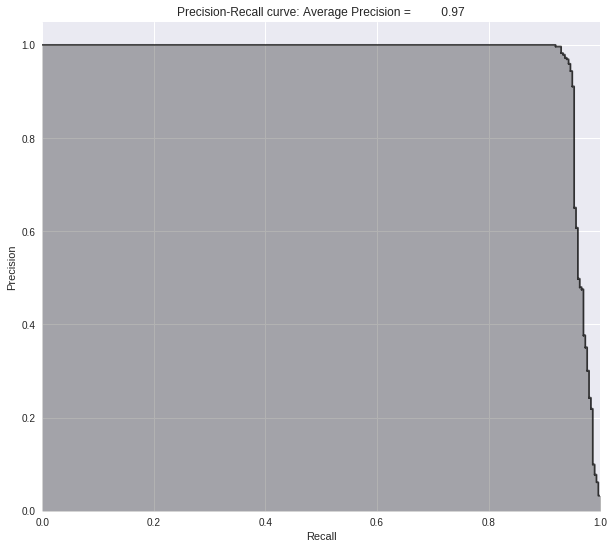

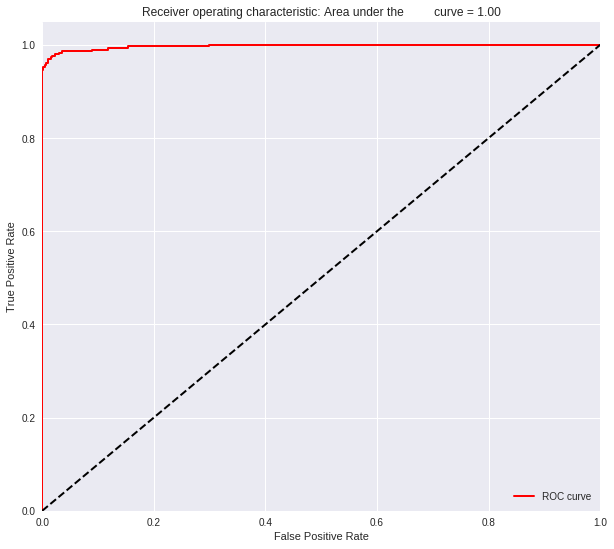

W0102 18:04:24.166863 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:04:36.851449 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 26us/sample
Mean for anomaly scores:  0.014795154622366078


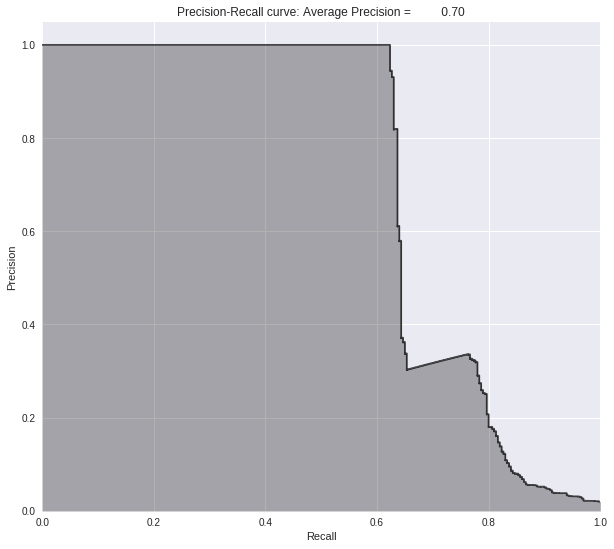

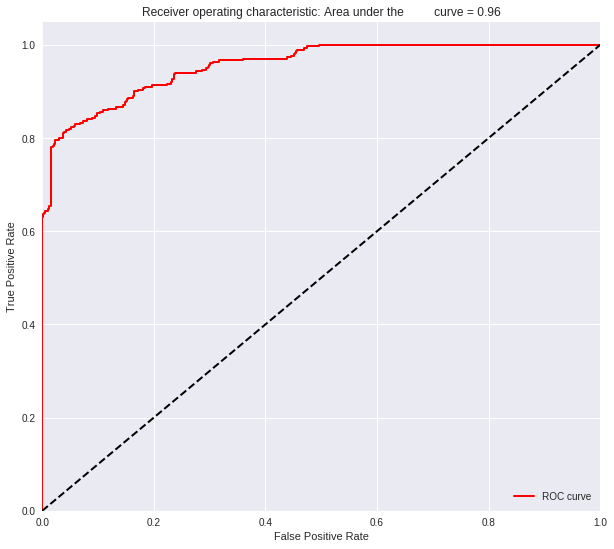

W0102 18:04:38.496805 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
W0102 18:04:51.522738 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 24us/sample
Mean for anomaly scores:  0.007838556275271026


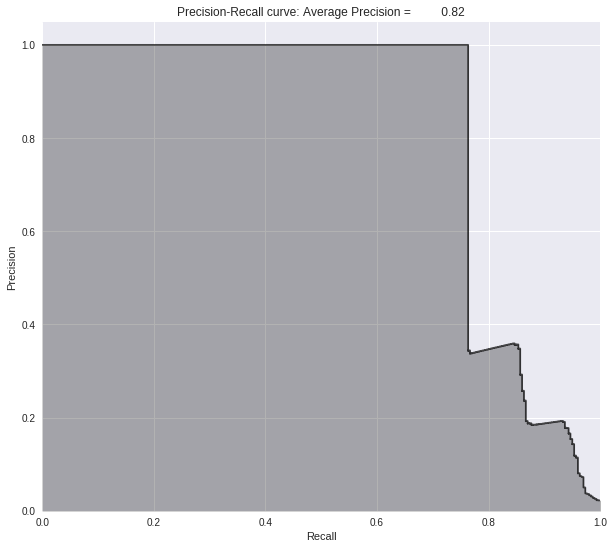

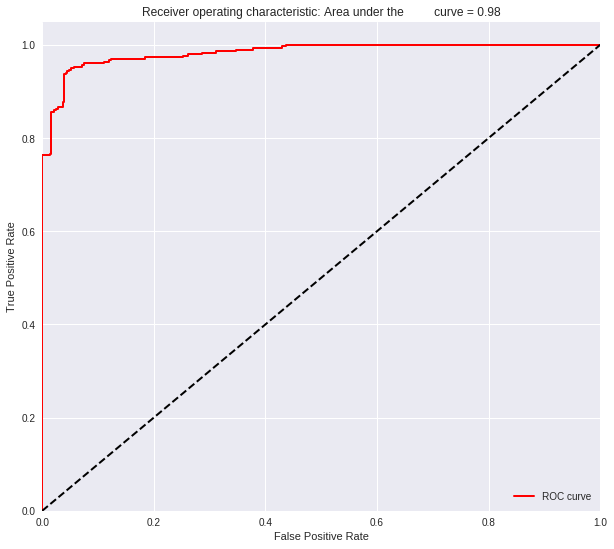

Mean average precision over 10 runs:  0.8791339721518018
Coefficient of variation over 10 runs:  0.17741810703317376


[0.9626841088535527,
 0.978173639613372,
 0.9741505787588184,
 0.9685280386575267,
 0.9682429598273246,
 0.49052905219821047,
 0.9637698131168616,
 0.9672667933879688,
 0.7010300574880607,
 0.8169646796163225]

In [35]:
# 10 runs - We will capture mean of average precision
test_scores = []
best_precision = 0
for i in range(0,10):
    # Call neural network API
    model = Sequential()

    # Apply linear activation function to input layer
    # Generate hidden layer with 14 nodes, the same as the input layer
    model.add(Dense(units=14, activation='linear',input_dim=14))
    model.add(Dense(units=14, activation='linear'))

    # Apply linear activation function to hidden layer
    # Generate output layer with 14 nodes
    model.add(Dense(units=14, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    # Train the model
    num_epochs = 10
    batch_size = 256

    history = model.fit(x=dataX, y=dataX,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(dataX, dataX),
                        verbose=0)

    # Evaluate on test set
    predictions = model.predict(testDataX, verbose=1)
    anomalyScoresAE = anomalyScores(testDataX, predictions)
    preds, avgPrecision = plotResults(testDataY, anomalyScoresAE, True)
    test_scores.append(avgPrecision)
    
    if avgPrecision > best_precision:
        best_precision = avgPrecision
        print("Saving model with best precision: ", best_precision)
        tf.saved_model.save(model, "./fraud_model/")

# Results
print("Mean average precision over 10 runs: ", np.mean(test_scores))
print("Coefficient of variation over 10 runs: ", np.std(test_scores)/ \
                                                np.mean(test_scores))
test_scores

In [36]:
imported_model = tf.keras.models.load_model("./fraud_model/")

In [37]:
# Evaluate on test set
predictions = imported_model.predict(testDataX, verbose=1)
anomalyScoresAE = anomalyScores(testDataX, predictions)

W0102 19:02:08.765792 140497700919104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


30300/30300 [==============================] - 1s 26us/sample
Mean for anomaly scores:  0.0033387805516674014


In [38]:
testDataCost = df_test['Cost'].copy()
df_preds = pd.concat([testDataCost, testDataY, anomalyScoresAE], axis=1)
df_preds.columns = ['Cost', 'Fraud', 'AnomalyScore']

conditions = [
    (df_preds['Fraud'] == 1) & (df_preds['AnomalyScore'] >= 0.01),
    (df_preds['Fraud'] == 0) & (df_preds['AnomalyScore'] >= 0.01),
    (df_preds['Fraud'] == 1) & (df_preds['AnomalyScore'] < 0.01)]
choices = [1, 2, 3]

df_preds['FraudPredict'] = np.select(conditions, choices, default=0)

df_preds.tail()

,Cost,Fraud,AnomalyScore,FraudPredict
5161,5928.100600,0.0,0.001526,0
26269,12040.990804,0.0,0.002539,0
26251,8014.451988,0.0,0.000801,0
23986,25917.372412,0.0,0.003211,0
22741,4056.217002,0.0,0.002223,0


In [39]:
pd.value_counts(df_preds['FraudPredict'])

0    30000
1      286
3       14
Name: FraudPredict, dtype: int64

In [40]:
outliers = pd.DataFrame()
outliers['cust_id'] = df_preds.index.values
outliers['FraudPredict'] = df_preds['FraudPredict']
outliers['Cost'] = df_preds['Cost']

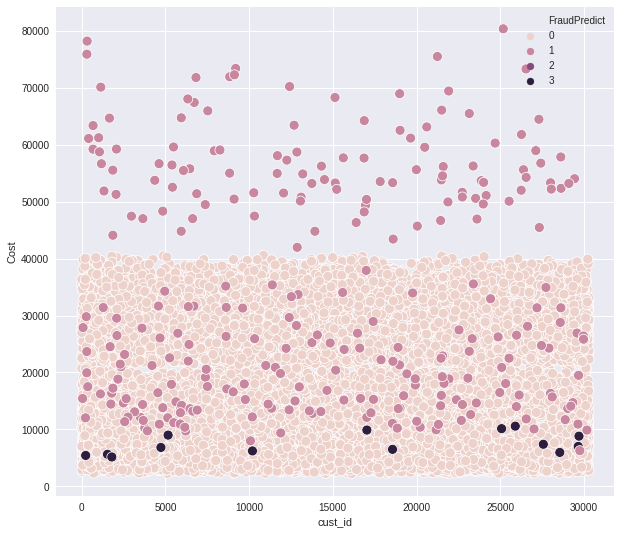

In [41]:
sns.scatterplot(x='cust_id', y='Cost', data=outliers, s=100, legend='brief', hue='FraudPredict')

In [42]:
testDataCost = df_test['Cost'].copy()
df_preds = pd.concat([testDataCost, testDataY, anomalyScoresAE], axis=1)
df_preds.columns = ['Cost', 'Fraud', 'AnomalyScore']

conditions = [
    (df_preds['Fraud'] == 1) & (df_preds['AnomalyScore'] >= 0.005),
    (df_preds['Fraud'] == 0) & (df_preds['AnomalyScore'] >= 0.005),
    (df_preds['Fraud'] == 1) & (df_preds['AnomalyScore'] < 0.005)]
choices = [1, 2, 3]

df_preds['FraudPredict'] = np.select(conditions, choices, default=0)

df_preds.tail()

,Cost,Fraud,AnomalyScore,FraudPredict
5161,5928.100600,0.0,0.001526,0
26269,12040.990804,0.0,0.002539,0
26251,8014.451988,0.0,0.000801,0
23986,25917.372412,0.0,0.003211,0
22741,4056.217002,0.0,0.002223,0


In [43]:
pd.value_counts(df_preds['FraudPredict'])

0    29636
2      364
1      293
3        7
Name: FraudPredict, dtype: int64

In [44]:
outliers = pd.DataFrame()
outliers['cust_id'] = df_preds.index.values
outliers['FraudPredict'] = df_preds['FraudPredict']
outliers['Cost'] = df_preds['Cost']

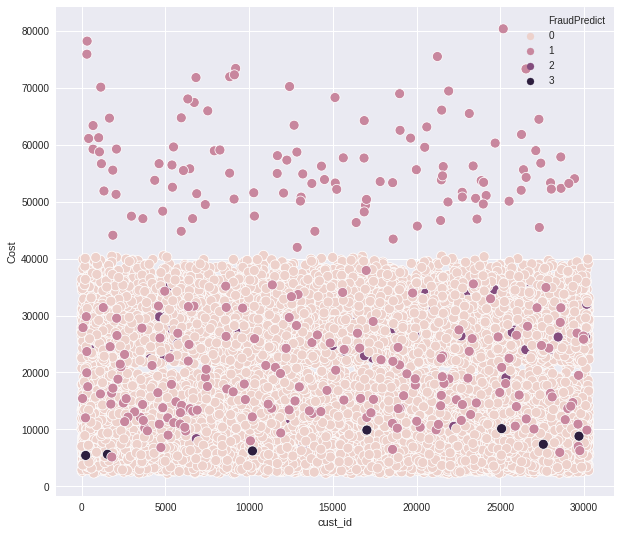

In [45]:
sns.scatterplot(x='cust_id', y='Cost', data=outliers, s=100, legend='brief', hue='FraudPredict')

In [60]:
testDataCost = df_test['Cost'].copy()
df_preds = pd.concat([testDataCost, testDataY, anomalyScoresAE], axis=1)
df_preds.columns = ['Cost', 'Fraud', 'AnomalyScore']

conditions = [
    (df_preds['Fraud'] == 1) & (df_preds['AnomalyScore'] >= 0.003),
    (df_preds['Fraud'] == 0) & (df_preds['AnomalyScore'] >= 0.003),
    (df_preds['Fraud'] == 1) & (df_preds['AnomalyScore'] < 0.003)]
choices = [1, 2, 3]

df_preds['FraudPredict'] = np.select(conditions, choices, default=0)

df_preds.tail()

,Cost,Fraud,AnomalyScore,FraudPredict
5161,5928.100600,0.0,0.001526,0
26269,12040.990804,0.0,0.002539,0
26251,8014.451988,0.0,0.000801,0
23986,25917.372412,0.0,0.003211,2
22741,4056.217002,0.0,0.002223,0


In [61]:
pd.value_counts(df_preds['FraudPredict'])

0    26707
2     3293
1      300
Name: FraudPredict, dtype: int64

In [62]:
outliers = pd.DataFrame()
outliers['cust_id'] = df_preds.index.values
outliers['FraudPredict'] = df_preds['FraudPredict']
outliers['Cost'] = df_preds['Cost']

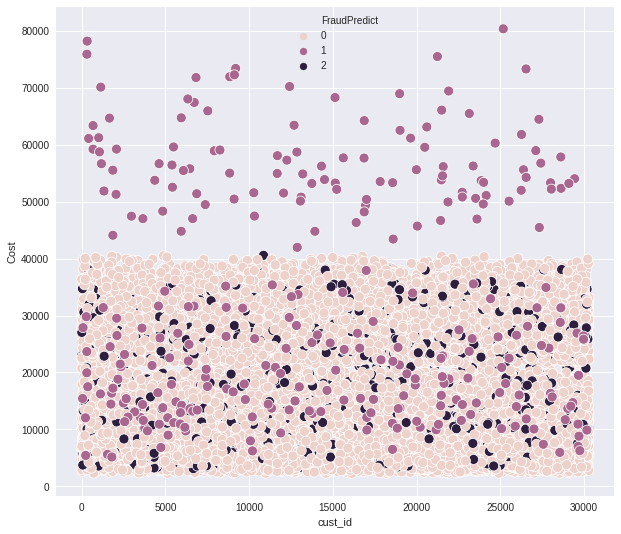

In [63]:
sns.scatterplot(x='cust_id', y='Cost', data=outliers, s=100, legend='brief', hue='FraudPredict')